Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Reading of the file

In [2]:
#reading of the file
file = "C:\\Users\\1221\\Desktop\\KIFYA SCHOLASHIP\\WEEK 1\\raw_analyst_ratings.csv"

df = pd.read_csv(file)
df

,Id,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1048570,1053768,First Horizon National to Replace QLogic in S&...,https://www.benzinga.com/news/13/06/3678254/fi...,Paul Quintaro,6/14/2013 0:00,QLGC
1048571,1053769,"UPDATE: QLogic Announces Restructuring Plan, t...",https://www.benzinga.com/news/13/06/3645866/up...,Paul Quintaro,6/4/2013 0:00,QLGC
1048572,1053770,"QLogic Announces Restructuring Plan, to Cut Jo...",https://www.benzinga.com/news/13/06/3645825/ql...,Paul Quintaro,6/4/2013 0:00,QLGC
1048573,1053771,QLogic Corporation Reports Q4 EPS of $0.17 vs ...,https://www.benzinga.com/news/earnings/13/05/3...,Paul Quintaro,5/2/2013 0:00,QLGC


In [3]:
unique_companies_list = df['stock'].unique().tolist()

unique_companies_list




['A',
 'AA',
 'AAC',
 'AADR',
 'AAL',
 'AAMC',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAU',
 'AAV',
 'AAVL',
 'AAWW',
 'AAXJ',
 'AB',
 'ABAC',
 'ABAX',
 'ABB',
 'ABBV',
 'ABC',
 'ABCB',
 'ABCD',
 'ABCO',
 'ABCW',
 'ABDC',
 'ABEV',
 'ABG',
 'ABGB',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABTL',
 'ABX',
 'ABY',
 'ACAD',
 'ACAS',
 'ACAT',
 'ACC',
 'ACCO',
 'ACCU',
 'ACE',
 'ACET',
 'ACFC',
 'ACFN',
 'ACG',
 'ACGL',
 'ACH',
 'ACHC',
 'ACHN',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMP',
 'ACN',
 'ACNB',
 'ACOR',
 'ACP',
 'ACPW',
 'ACRE',
 'ACRX',
 'ACSF',
 'ACST',
 'ACT',
 'ACTA',
 'ACTG',
 'ACTS',
 'ACU',
 'ACUR',
 'ACWI',
 'ACWV',
 'ACWX',
 'ACXM',
 'ACY',
 'ADAT',
 'ADBE',
 'ADC',
 'ADEP',
 'ADES',
 'ADGE',
 'ADHD',
 'ADI',
 'ADK',
 'ADM',
 'ADMA',
 'ADMP',
 'ADMS',
 'ADNC',
 'ADP',
 'ADPT',
 'ADRA',
 'ADRD',
 'ADRE',
 'ADRU',
 'ADS',
 'ADSK',
 'ADT',
 'ADTN',
 'ADVS',
 'ADX',
 'ADXS',
 'ADZ',
 'AE',
 'AEB',
 'AEC',
 'AEE',
 'AEG',
 'AEGN',
 'AEGR',
 'AEHR',
 'AEIS',
 'AEL',
 'AEM',
 'A

Exploratory Data Analysis

In [4]:
#printing the shape of dataframe
df.shape

(1048575, 6)

In [5]:
#printing the data types of dataframe
df.dtypes

Id            int64
headline     object
url          object
publisher    object
date         object
stock        object
dtype: object

In [6]:
#asses if there is a missing value
df.isnull().sum()

Id           0
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [7]:
#dropping of the id column as it is not necessary for the sentiment analysis
df = df.drop("Id", axis = 1)
df

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1048570,First Horizon National to Replace QLogic in S&...,https://www.benzinga.com/news/13/06/3678254/fi...,Paul Quintaro,6/14/2013 0:00,QLGC
1048571,"UPDATE: QLogic Announces Restructuring Plan, t...",https://www.benzinga.com/news/13/06/3645866/up...,Paul Quintaro,6/4/2013 0:00,QLGC
1048572,"QLogic Announces Restructuring Plan, to Cut Jo...",https://www.benzinga.com/news/13/06/3645825/ql...,Paul Quintaro,6/4/2013 0:00,QLGC
1048573,QLogic Corporation Reports Q4 EPS of $0.17 vs ...,https://www.benzinga.com/news/earnings/13/05/3...,Paul Quintaro,5/2/2013 0:00,QLGC


In [8]:
#changing diffrent formats of date to the same format by adding a column
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)

df

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A
...,...,...,...,...,...
1048570,First Horizon National to Replace QLogic in S&...,https://www.benzinga.com/news/13/06/3678254/fi...,Paul Quintaro,2013-06-14 00:00:00+00:00,QLGC
1048571,"UPDATE: QLogic Announces Restructuring Plan, t...",https://www.benzinga.com/news/13/06/3645866/up...,Paul Quintaro,2013-06-04 00:00:00+00:00,QLGC
1048572,"QLogic Announces Restructuring Plan, to Cut Jo...",https://www.benzinga.com/news/13/06/3645825/ql...,Paul Quintaro,2013-06-04 00:00:00+00:00,QLGC
1048573,QLogic Corporation Reports Q4 EPS of $0.17 vs ...,https://www.benzinga.com/news/earnings/13/05/3...,Paul Quintaro,2013-05-02 00:00:00+00:00,QLGC


In [9]:
# Add a new column for headline length
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline length
headline_stats = df['headline_length'].describe()
headline_stats

count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

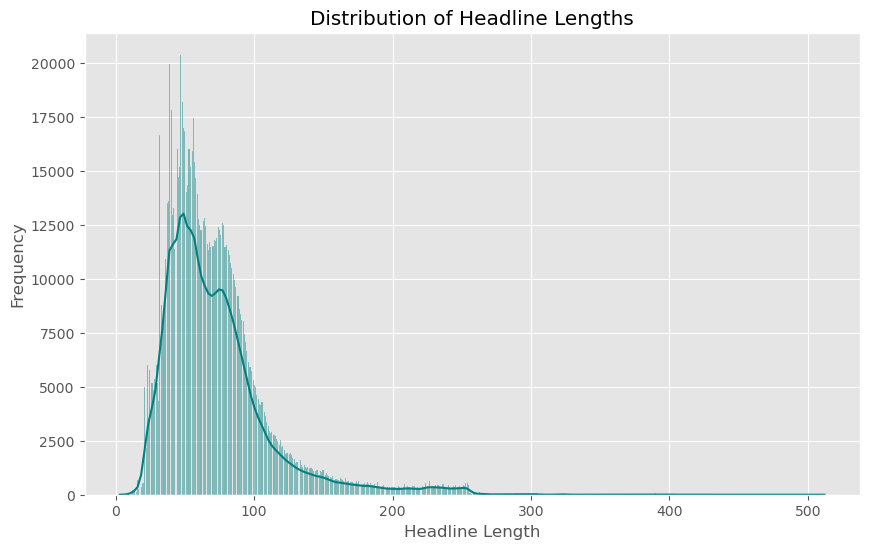

In [10]:
# plot distribution with different colors
plt.figure(figsize=(10, 6))

sns.histplot(df['headline_length'], kde=True, color='teal')

plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


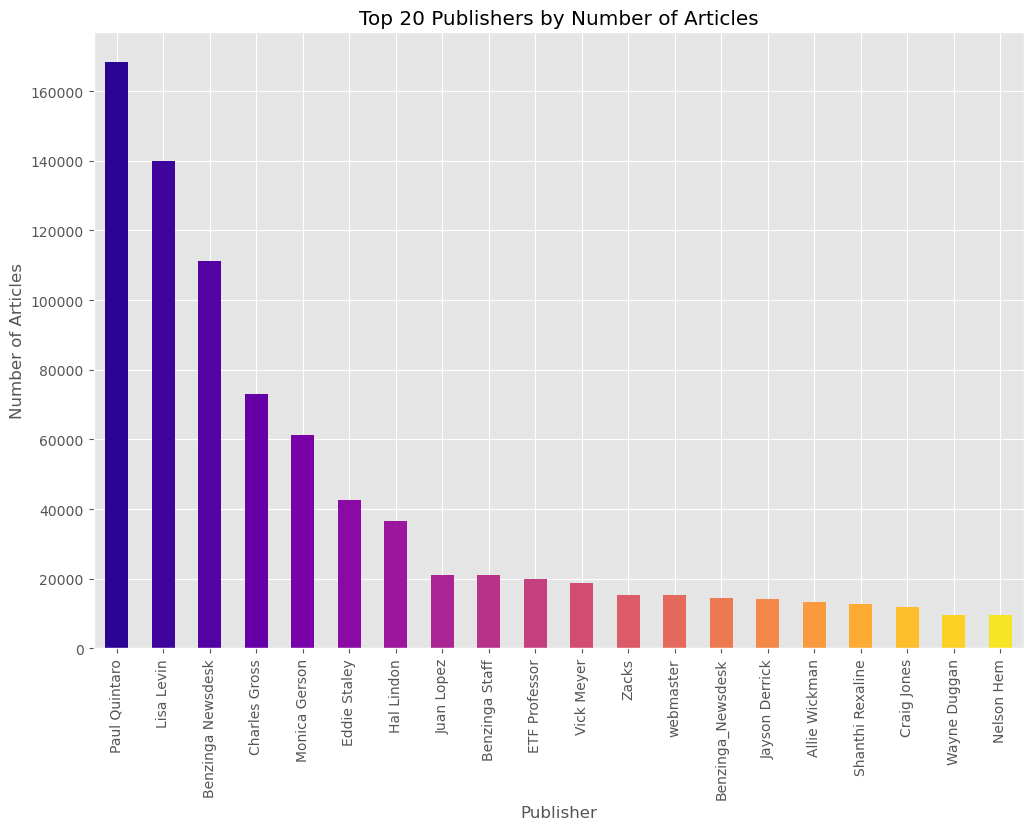

In [11]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Define a color palette with the desired number of colors
colors = sns.color_palette('plasma', n_colors=20)

# Plot the top publishers
plt.figure(figsize=(12, 8))
publisher_counts.head(20).plot(kind='bar', color = colors)
plt.title('Top 20 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

Number of Articles Published Over Time

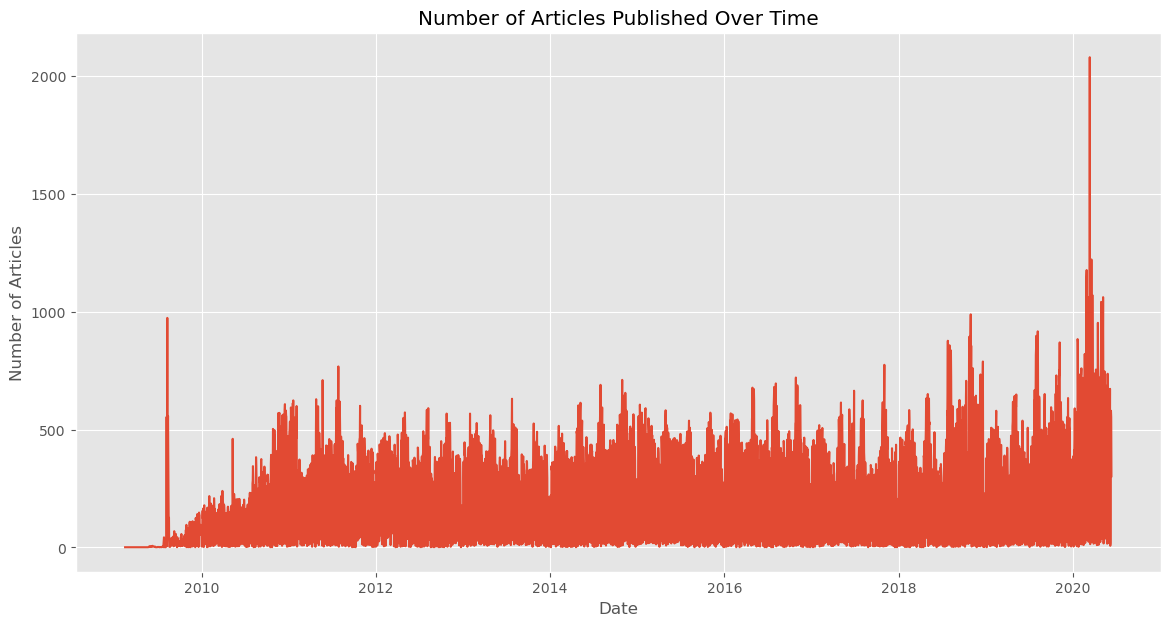

In [12]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], utc=True)

# Analyze publication dates
df['Date'] = df['date'].dt.date

# Count articles per day
daily_counts = df.groupby('Date').size()

# Plot publication trends over time
plt.figure(figsize=(14, 7))
daily_counts.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

Text Analysis

In [13]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment score'] = df['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorize sentiment
df['sentiment_category'] = df['sentiment score'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')

# Plot sentiment distribution with hue
plt.figure(figsize=(10, 6))
sns.histplot(df, x='sentiment score', hue='sentiment_category', kde=True, bins=30, palette='plasma')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

KeyboardInterrupt: 

Sentiment score plot of financial news as categorical variable 

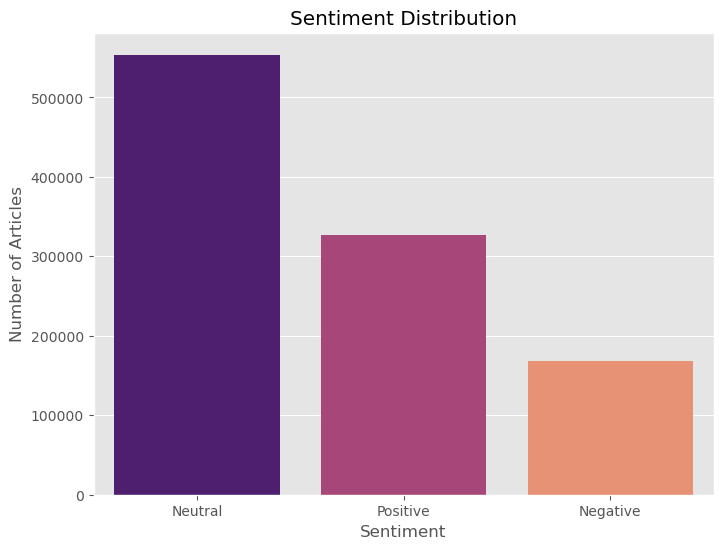

In [ ]:
# Categorize sentiment
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment score'].apply(categorize_sentiment)

# Count the number of each sentiment
sentiment_counts = df['sentiment_category'].value_counts()

# Plot the sentiment counts
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='magma')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
# Group by the 'stock' column and sum the sentiment scores for each stock
sentiment_sum_by_stock = df.groupby('stock')['sentiment score'].sum()

# Display the summed sentiment scores for each stock
sentiment_sum_by_stock

stock
A       101.4327
AA      116.2595
AAC       4.7853
AADR      0.1695
AAL      28.8684
          ...   
QIWI     20.9878
QKLS     -4.5329
QKOR      0.0000
QLD       2.3217
QLGC      7.0386
Name: sentiment score, Length: 4590, dtype: float64

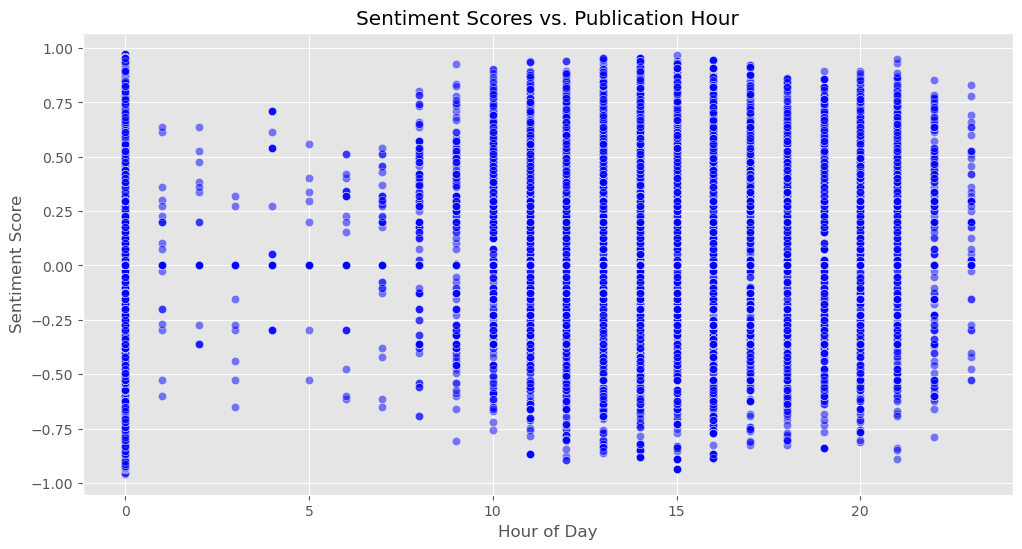

In [ ]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Extract hour from the publication time
df['hour'] = df['date'].dt.hour

# Plot sentiment score vs. publication hour
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hour', y='sentiment score', data=df, alpha=0.5, color='blue')
plt.title('Sentiment Scores vs. Publication Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Sentiment Score')
plt.show()

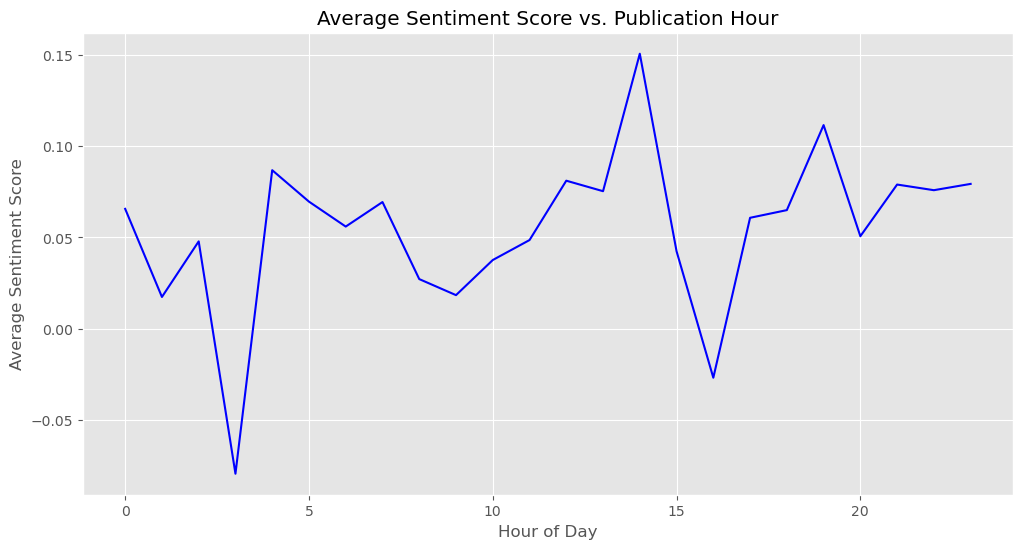

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='sentiment score', data=df, errorbar=None, color='blue')
plt.title('Average Sentiment Score vs. Publication Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sentiment Score')
plt.show()

Topic Modeling

In [ ]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit and transform the headlines
X = vectorizer.fit_transform(df['headline'])

# Initialize LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

Topic 0:
['new', 'stock', 'morning', 'benzinga', 'markets', 'shares', 'mid', 'announces', 'update', 'market']
Topic 1:
['q3', 'q1', 'q4', 'estimate', 'sees', 'sales', 'reports', 'eps', 'est', 'vs']
Topic 2:
['00', 'earnings', 'price', 'maintains', 'raises', 'target', 'upgrades', 'downgrades', 'buy', 'pt']
Topic 3:
['company', 'oil', 'analyst', 'earnings', 'lower', 'says', 'higher', 'companies', 'trading', 'shares']
Topic 4:
['market', 'day', 'new', 'yesterday', 'biggest', 'moving', 'session', '52', 'week', 'stocks']


Time Series Analysis

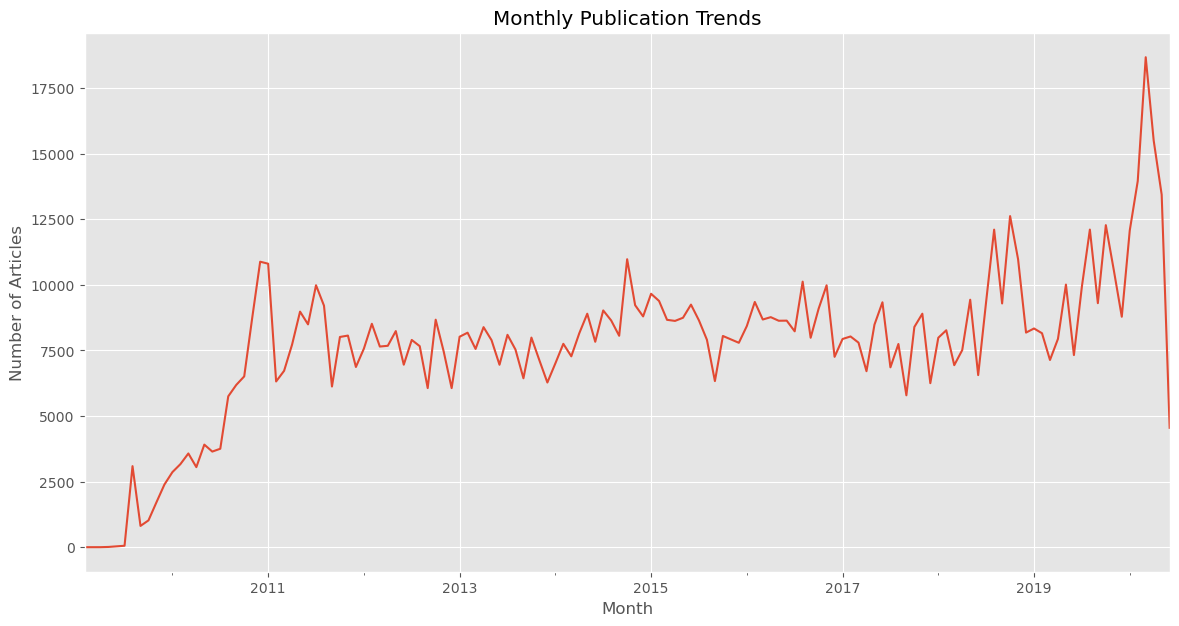

In [14]:
# Resample the data to monthly frequency and count articles
monthly_counts = df.set_index('date').resample('M').size()

# Plot monthly publication trends
plt.figure(figsize=(14, 7))
monthly_counts.plot()
plt.title('Monthly Publication Trends')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()

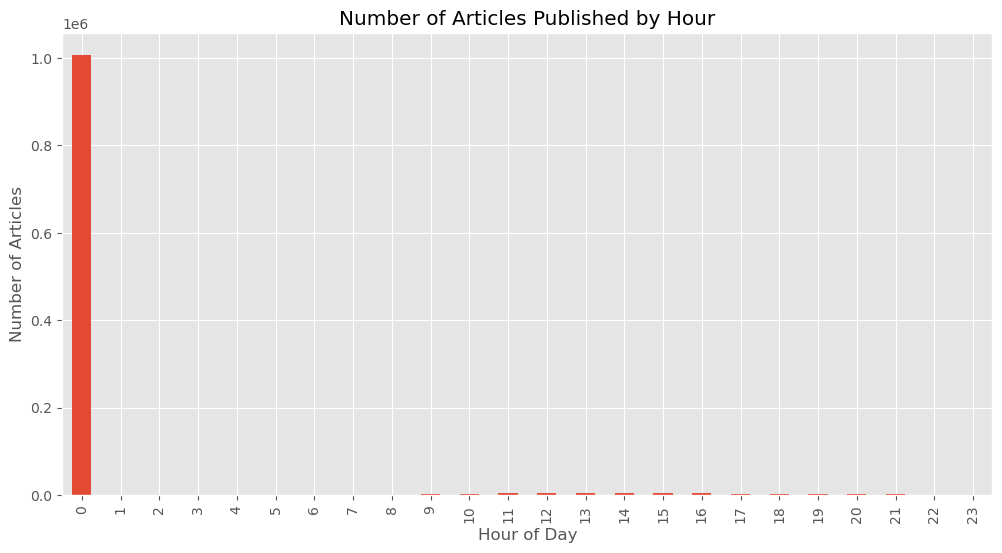

In [15]:
# Extract hour from datetime
df['hour'] = df['date'].dt.hour

# Count articles per hour
hourly_counts = df.groupby('hour').size()

# Plot publication times
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Number of Articles Published by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()

In [16]:
              # Save DataFrame to a CSV file
#df_sentiment = df.to_csv('final sentiment data.csv', index=False)
